In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Основная информация о сотрудниках
employees = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Иванов И.И.', 'Петрова А.А.', 'Сидоров В.В.', 'Козлов Д.Д.', 'Смирнова Е.Е.'],
    'Department': ['Геология', 'IT', 'Управление', 'Геология', 'IT'],
    'Location': ['Тюмень', 'Санкт-Петербург', 'Москва', 'Тюмень', 'Санкт-Петербург']
})

# Области знаний и компетенции
knowledge = pd.DataFrame({
    'ID': [1, 1, 2, 2, 3, 4, 5],
    'Knowledge Area': ['Геология', 'Гидродинамика', 'Машинное обучение', 'Python', 'Управление проектами', 'Геология', 'Python'],
    'Skill Level': [5, 3, 5, 4, 5, 4, 3]
})

# Взаимодействие между сотрудниками
interactions = pd.DataFrame({
    'From_ID': [1, 2, 3, 4, 5],
    'To_ID': [2, 3, 1, 5, 4],
    'Frequency': [10, 5, 2, 3, 7],
    'Topic': ['Геология и ML', 'Управление проектами', 'Геологические данные', 'Python', 'Геология']
})

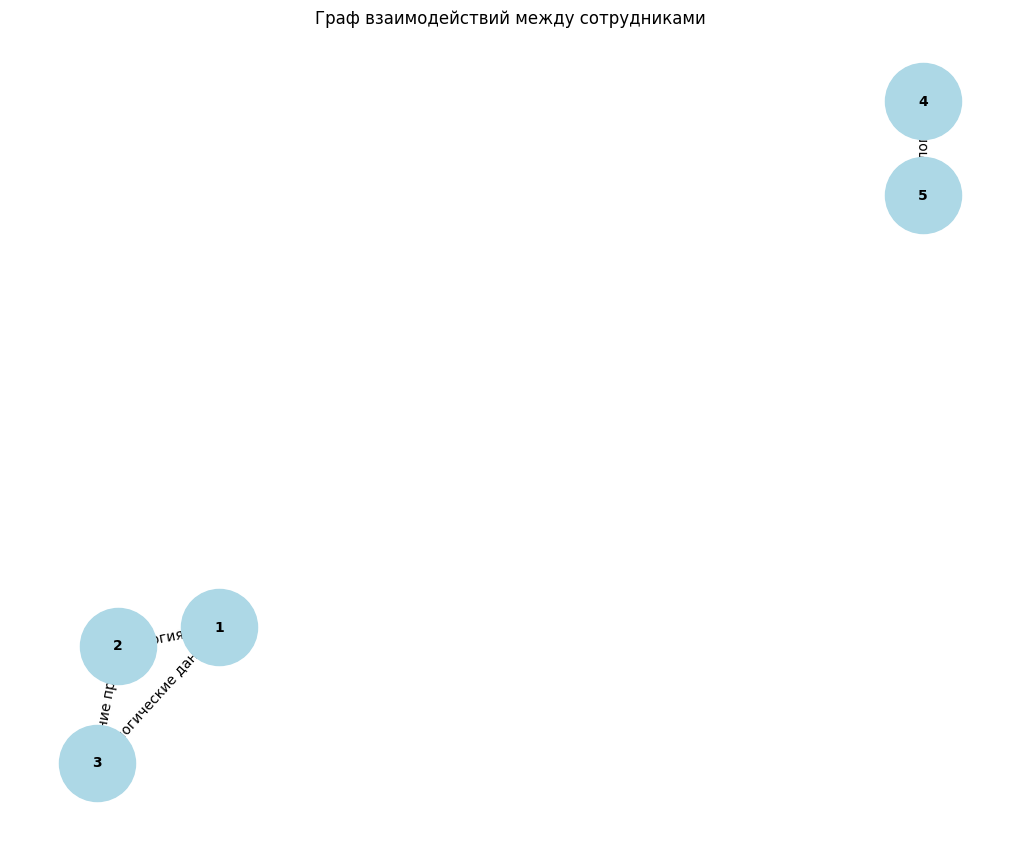

In [3]:
# Создание графа взаимодействий
G = nx.DiGraph()

# Добавление узлов (сотрудников)
for _, row in employees.iterrows():
    G.add_node(row['ID'], name=row['Name'], department=row['Department'], location=row['Location'])

# Добавление ребер (взаимодействий)
for _, row in interactions.iterrows():
    G.add_edge(row['From_ID'], row['To_ID'], weight=row['Frequency'], topic=row['Topic'])

# Визуализация графа
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['topic'] for u, v, d in G.edges(data=True)})
plt.title("Граф взаимодействий между сотрудниками")
plt.show()

In [4]:
# Степень узла (количество связей)
degree_centrality = nx.degree_centrality(G)
print("Степень узла (Degree Centrality):", degree_centrality)

# Центральность по близости (Closeness Centrality)
closeness_centrality = nx.closeness_centrality(G)
print("Центральность по близости (Closeness Centrality):", closeness_centrality)

# Центральность по посредничеству (Betweenness Centrality)
betweenness_centrality = nx.betweenness_centrality(G)
print("Центральность по посредничеству (Betweenness Centrality):", betweenness_centrality)

Степень узла (Degree Centrality): {1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5}
Центральность по близости (Closeness Centrality): {1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333, 4: 0.25, 5: 0.25}
Центральность по посредничеству (Betweenness Centrality): {1: 0.08333333333333333, 2: 0.08333333333333333, 3: 0.08333333333333333, 4: 0.0, 5: 0.0}


Средний уровень знаний по областям:
         Knowledge Area  Skill Level
0                Python          3.5
1              Геология          4.5
2         Гидродинамика          3.0
3     Машинное обучение          5.0
4  Управление проектами          5.0


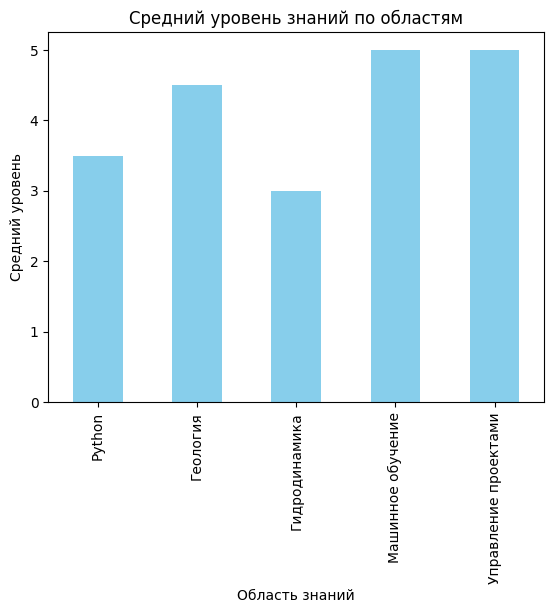

In [5]:
# Группировка по областям знаний
knowledge_summary = knowledge.groupby('Knowledge Area')['Skill Level'].mean().reset_index()
print("Средний уровень знаний по областям:")
print(knowledge_summary)

# Визуализация
knowledge_summary.plot(kind='bar', x='Knowledge Area', y='Skill Level', legend=False, color='skyblue')
plt.title("Средний уровень знаний по областям")
plt.xlabel("Область знаний")
plt.ylabel("Средний уровень")
plt.show()